In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [4]:
df_mat = pd.read_csv("data/student-mat.csv", sep=';')
df_mat.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [7]:
df_por = pd.read_csv("data/student-por.csv" , sep=";")
df_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


# EDA

## 📄 UCI Student Performance Dataset

### 🔢 Attributes for both `student-mat.csv` (Math course) and `student-por.csv` (Portuguese course):

1. **school** - student's school (binary): `"GP"` (Gabriel Pereira) or `"MS"` (Mousinho da Silveira)  
2. **sex** - student's sex (binary): `"F"` (female) or `"M"` (male)  
3. **age** - student's age (numeric): from 15 to 22  
4. **address** - home address type (binary): `"U"` (urban) or `"R"` (rural)  
5. **famsize** - family size (binary): `"LE3"` (≤3) or `"GT3"` (>3)  
6. **Pstatus** - parent's cohabitation status (binary): `"T"` (together) or `"A"` (apart)  
7. **Medu** - mother's education (numeric):  
   - 0: none  
   - 1: primary education (4th grade)  
   - 2: 5th to 9th grade  
   - 3: secondary education  
   - 4: higher education  
8. **Fedu** - father's education (same scale as Medu)  
9. **Mjob** - mother's job (nominal): `"teacher"`, `"health"`, `"services"`, `"at_home"`, `"other"`  
10. **Fjob** - father's job (same as Mjob)  
11. **reason** - reason for choosing this school (nominal): `"home"`, `"reputation"`, `"course"`, `"other"`  
12. **guardian** - student's guardian (nominal): `"mother"`, `"father"`, `"other"`  
13. **traveltime** - home to school travel time (numeric):  
    - 1: <15 min  
    - 2: 15–30 min  
    - 3: 30 min–1 hour  
    - 4: >1 hour  
14. **studytime** - weekly study time (numeric):  
    - 1: <2 hours  
    - 2: 2–5 hours  
    - 3: 5–10 hours  
    - 4: >10 hours  
15. **failures** - number of past class failures (numeric): 0–3, 4 = 4+ failures  
16. **schoolsup** - extra educational support (binary): `"yes"` or `"no"`  
17. **famsup** - family educational support (binary): `"yes"` or `"no"`  
18. **paid** - extra paid classes (binary): `"yes"` or `"no"`  
19. **activities** - extra-curricular activities (binary): `"yes"` or `"no"`  
20. **nursery** - attended nursery school (binary): `"yes"` or `"no"`  
21. **higher** - wants to pursue higher education (binary): `"yes"` or `"no"`  
22. **internet** - internet access at home (binary): `"yes"` or `"no"`  
23. **romantic** - in a romantic relationship (binary): `"yes"` or `"no"`  
24. **famrel** - family relationship quality (numeric): 1 (very bad) to 5 (excellent)  
25. **freetime** - free time after school (numeric): 1 (very low) to 5 (very high)  
26. **goout** - going out with friends (numeric): 1 (very low) to 5 (very high)  
27. **Dalc** - workday alcohol consumption (numeric): 1 (very low) to 5 (very high)  
28. **Walc** - weekend alcohol consumption (numeric): 1 (very low) to 5 (very high)  
29. **health** - current health status (numeric): 1 (very bad) to 5 (very good)  
30. **absences** - number of school absences (numeric): from 0 to 93  

### 🎯 Grade Attributes:
31. **G1** - First period grade (0–20)  
32. **G2** - Second period grade (0–20)  
33. **G3** - Final grade (0–20) → **Target variable**

---

⚠️ Note:  
There are several (382) students common to both datasets.  
These can be identified via identical attributes, as outlined in the dataset's accompanying R script.



In [13]:
df_mat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [14]:
df_por.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [15]:
df_mat.shape , df_por.shape

((395, 33), (649, 33))

# Right Now lets just use mat data set and predict G3 of maths 

In [17]:
df_mat.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [20]:
df_mat.corr()

ValueError: could not convert string to float: 'GP'

# We are seeing this error lets first convert string to numeric using panda catagorical 

In [22]:
for label , content in df_mat.items():
    if pd.api.types.is_object_dtype(content):
        print(label)

school
sex
address
famsize
Pstatus
Mjob
Fjob
reason
guardian
schoolsup
famsup
paid
activities
nursery
higher
internet
romantic


In [23]:
#turn all string values in categories
for label  , content in df_mat.items():
    if pd.api.types.is_object_dtype(content):
        df_mat[label] = content.astype("category").cat.as_ordered()


In [24]:
df_mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [25]:
df_mat["school"].cat.codes

0      0
1      0
2      0
3      0
4      0
      ..
390    1
391    1
392    1
393    1
394    1
Length: 395, dtype: int8

In [27]:
df_mat["activities"].cat.codes

0      0
1      0
2      0
3      1
4      0
      ..
390    0
391    0
392    0
393    0
394    0
Length: 395, dtype: int8

In [28]:
df_mat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   school      395 non-null    category
 1   sex         395 non-null    category
 2   age         395 non-null    int64   
 3   address     395 non-null    category
 4   famsize     395 non-null    category
 5   Pstatus     395 non-null    category
 6   Medu        395 non-null    int64   
 7   Fedu        395 non-null    int64   
 8   Mjob        395 non-null    category
 9   Fjob        395 non-null    category
 10  reason      395 non-null    category
 11  guardian    395 non-null    category
 12  traveltime  395 non-null    int64   
 13  studytime   395 non-null    int64   
 14  failures    395 non-null    int64   
 15  schoolsup   395 non-null    category
 16  famsup      395 non-null    category
 17  paid        395 non-null    category
 18  activities  395 non-null    category
 19  nursery 

# see object has changed to category

In [29]:
df_mat.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

# turn categorical variable in numbers 

In [31]:
for label , content in df_mat.items():
    if not pd.api.types.is_numeric_dtype(content):
        df_mat[label+"_is_missing"] = pd.isnull(content)

        df_mat[label]= pd.Categorical(content).codes

In [32]:
df_mat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 50 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   school                 395 non-null    int8 
 1   sex                    395 non-null    int8 
 2   age                    395 non-null    int64
 3   address                395 non-null    int8 
 4   famsize                395 non-null    int8 
 5   Pstatus                395 non-null    int8 
 6   Medu                   395 non-null    int64
 7   Fedu                   395 non-null    int64
 8   Mjob                   395 non-null    int8 
 9   Fjob                   395 non-null    int8 
 10  reason                 395 non-null    int8 
 11  guardian               395 non-null    int8 
 12  traveltime             395 non-null    int64
 13  studytime              395 non-null    int64
 14  failures               395 non-null    int64
 15  schoolsup              395 non-null    i

In [34]:
df_mat.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,reason_is_missing,guardian_is_missing,schoolsup_is_missing,famsup_is_missing,paid_is_missing,activities_is_missing,nursery_is_missing,higher_is_missing,internet_is_missing,romantic_is_missing
0,0,0,18,1,0,0,4,4,0,4,...,False,False,False,False,False,False,False,False,False,False
1,0,0,17,1,0,1,1,1,0,2,...,False,False,False,False,False,False,False,False,False,False
2,0,0,15,1,1,1,1,1,0,2,...,False,False,False,False,False,False,False,False,False,False
3,0,0,15,1,0,1,4,2,1,3,...,False,False,False,False,False,False,False,False,False,False
4,0,0,16,1,0,1,3,3,2,2,...,False,False,False,False,False,False,False,False,False,False
5,0,1,16,1,1,1,4,3,3,2,...,False,False,False,False,False,False,False,False,False,False
6,0,1,16,1,1,1,2,2,2,2,...,False,False,False,False,False,False,False,False,False,False
7,0,0,17,1,0,0,4,4,2,4,...,False,False,False,False,False,False,False,False,False,False
8,0,1,15,1,1,0,3,2,3,2,...,False,False,False,False,False,False,False,False,False,False
9,0,1,15,1,0,1,3,4,2,2,...,False,False,False,False,False,False,False,False,False,False


# Data Visualisation

In [40]:
df_mat.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,reason_is_missing,guardian_is_missing,schoolsup_is_missing,famsup_is_missing,paid_is_missing,activities_is_missing,nursery_is_missing,higher_is_missing,internet_is_missing,romantic_is_missing
390,1,1,20,1,1,0,2,2,3,3,...,False,False,False,False,False,False,False,False,False,False
391,1,1,17,1,1,1,3,1,3,3,...,False,False,False,False,False,False,False,False,False,False
392,1,1,21,0,0,1,1,1,2,2,...,False,False,False,False,False,False,False,False,False,False
393,1,1,18,0,1,1,3,2,3,2,...,False,False,False,False,False,False,False,False,False,False
394,1,1,19,1,1,1,1,1,2,0,...,False,False,False,False,False,False,False,False,False,False


In [41]:
df_mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,reason_is_missing,guardian_is_missing,schoolsup_is_missing,famsup_is_missing,paid_is_missing,activities_is_missing,nursery_is_missing,higher_is_missing,internet_is_missing,romantic_is_missing
0,0,0,18,1,0,0,4,4,0,4,...,False,False,False,False,False,False,False,False,False,False
1,0,0,17,1,0,1,1,1,0,2,...,False,False,False,False,False,False,False,False,False,False
2,0,0,15,1,1,1,1,1,0,2,...,False,False,False,False,False,False,False,False,False,False
3,0,0,15,1,0,1,4,2,1,3,...,False,False,False,False,False,False,False,False,False,False
4,0,0,16,1,0,1,3,3,2,2,...,False,False,False,False,False,False,False,False,False,False


In [49]:
from pandas.api.types import is_numeric_dtype, is_bool_dtype
data_temp_mat = pd.DataFrame()
for label, content in df_mat.items():
    if is_numeric_dtype(content) and not is_bool_dtype(content):
        data_temp_mat[label] = content

        

In [50]:
data_temp_mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,4,6,10,10


In [51]:
data_temp_mat.corr()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
school,1.000000,-0.012286,0.377610,-0.279797,0.064866,0.045923,-0.133333,-0.079807,-0.056670,0.018974,...,-0.047926,0.032988,-0.007152,0.114209,0.065087,-0.042651,-0.088480,-0.025731,-0.050086,-0.045017
sex,-0.012286,1.000000,-0.028606,-0.028504,0.089862,0.023443,0.078228,0.034878,0.191421,0.084957,...,0.058971,0.238744,0.075897,0.268171,0.274194,0.143588,-0.066962,0.091839,0.091099,0.103456
age,0.377610,-0.028606,1.000000,-0.146722,0.037847,0.029598,-0.163658,-0.163438,-0.069104,-0.035191,...,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230,-0.064081,-0.143474,-0.161579
address,-0.279797,-0.028504,-0.146722,1.000000,0.072472,-0.042572,0.138804,0.072178,0.108818,-0.001911,...,0.014258,0.034878,0.068835,-0.093494,-0.101126,-0.040355,-0.027874,0.069704,0.126037,0.105756
famsize,0.064866,0.089862,0.037847,0.072472,1.000000,-0.149612,-0.043068,-0.058879,0.071386,-0.084448,...,-0.022776,0.017695,0.023064,0.101521,0.103425,-0.028992,0.035783,0.071445,0.081223,0.081407
Pstatus,0.045923,0.023443,0.029598,-0.042572,-0.149612,1.000000,-0.123565,-0.088730,-0.054476,0.033892,...,0.025179,0.038717,0.003459,-0.030590,0.006045,0.022307,-0.134937,-0.016868,-0.041382,-0.058009
Medu,-0.133333,0.078228,-0.163658,0.138804,-0.043068,-0.123565,1.000000,0.623455,0.454805,0.157920,...,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285,0.205341,0.215527,0.217147
Fedu,-0.079807,0.034878,-0.163438,0.072178,-0.058879,-0.088730,0.623455,1.000000,0.243327,0.200169,...,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473,0.190270,0.164893,0.152457
Mjob,-0.056670,0.191421,-0.069104,0.108818,0.071386,-0.054476,0.454805,0.243327,1.000000,0.196758,...,0.038584,0.114321,0.003169,0.076076,-0.012051,0.065220,0.050254,0.081674,0.097390,0.102082
Fjob,0.018974,0.084957,-0.035191,-0.001911,-0.084448,0.033892,0.157920,0.200169,0.196758,1.000000,...,0.013709,-0.047475,0.010340,0.077897,0.070024,-0.018058,0.008196,0.057661,0.067006,0.042286


# lets see a heatmap

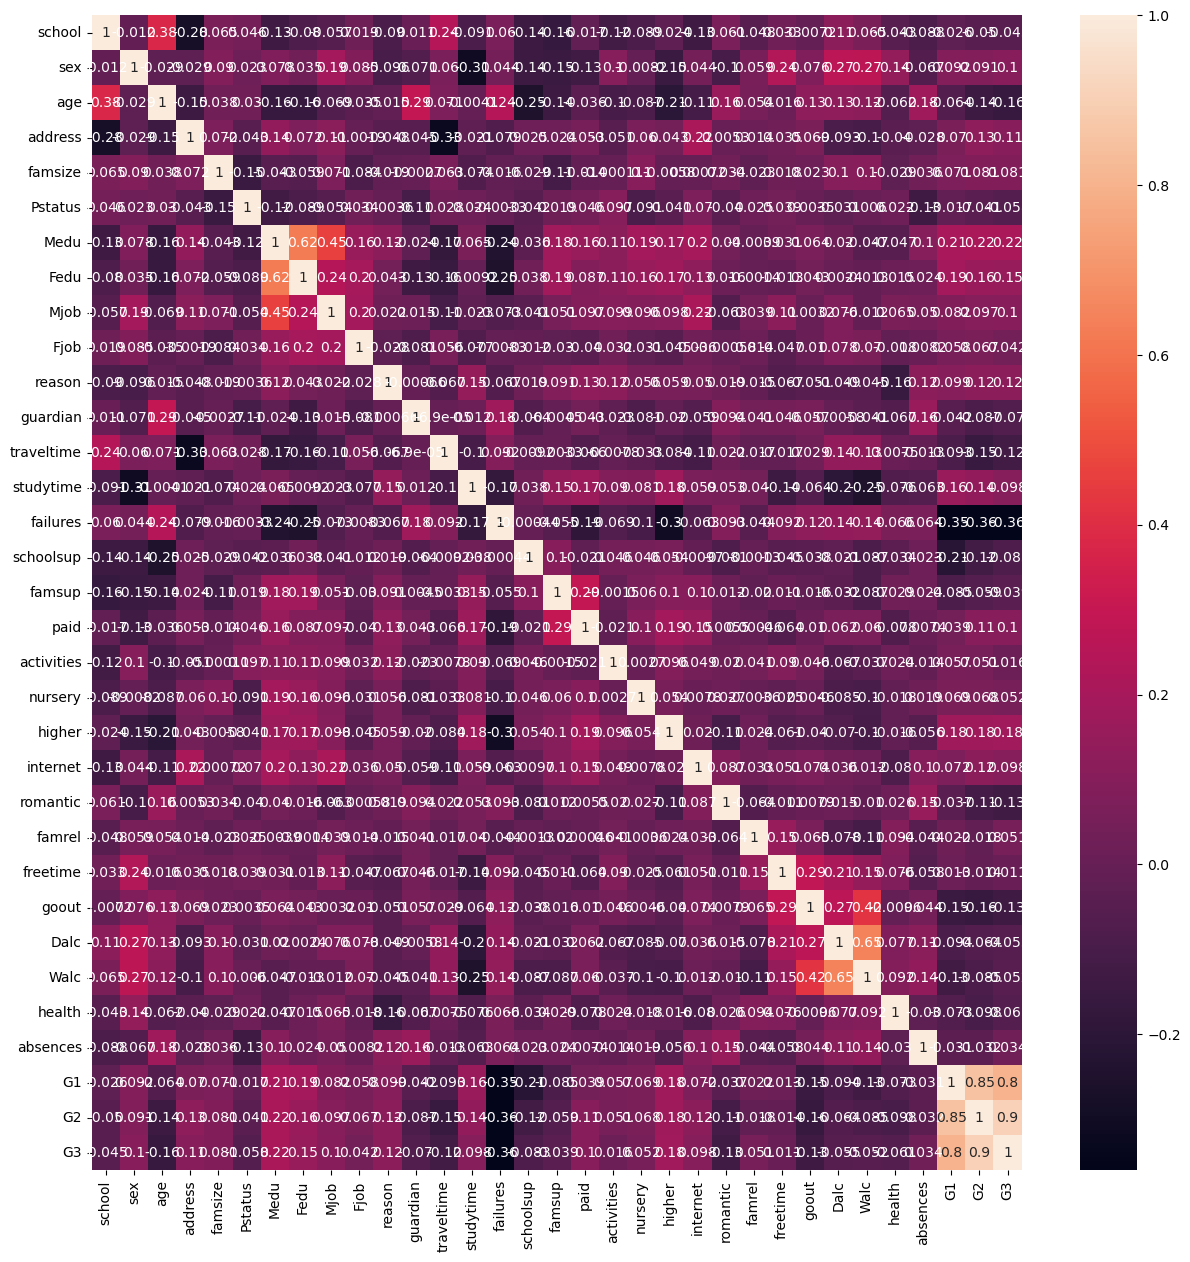

In [67]:
fig , ax = plt.subplots(figsize=(15 , 15))
sns.heatmap(data_temp_mat.corr() , annot= True )
plt.show()

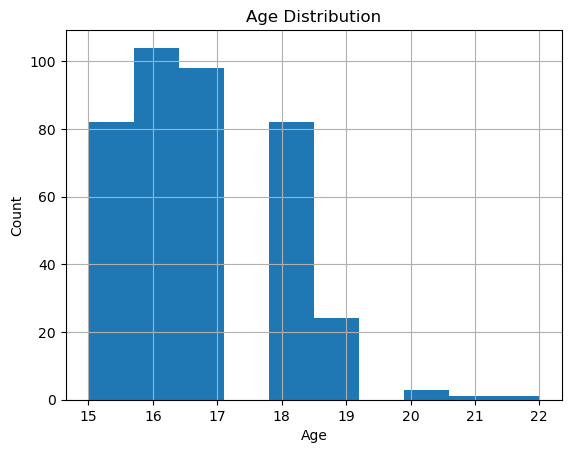

In [68]:
df_mat['age'].hist(bins=10)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [69]:
# sns.countplot(x='school', data=df_mat)
# plt.title('School-wise Student Count')
# plt.show()


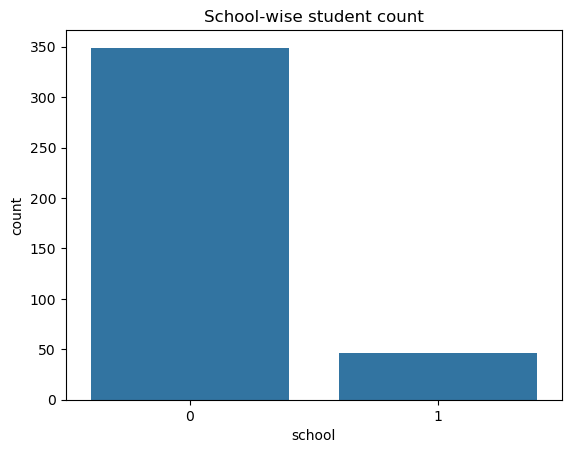

In [72]:
sns.countplot(x="school" , data=data_temp_mat)
plt.title("School-wise student count")
plt.show()

# modeling

# lets use lasso

In [77]:
from sklearn.linear_model  import Lasso
from sklearn.model_selection import train_test_split

In [78]:
x = data_temp_mat.drop("G3",axis=1)
y=data_temp_mat["G3"]

In [79]:
x

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,0,0,18,1,0,0,4,4,0,4,...,0,4,3,4,1,1,3,6,5,6
1,0,0,17,1,0,1,1,1,0,2,...,0,5,3,3,1,1,3,4,5,5
2,0,0,15,1,1,1,1,1,0,2,...,0,4,3,2,2,3,3,10,7,8
3,0,0,15,1,0,1,4,2,1,3,...,1,3,2,2,1,1,5,2,15,14
4,0,0,16,1,0,1,3,3,2,2,...,0,4,3,2,1,2,5,4,6,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,20,1,1,0,2,2,3,3,...,0,5,5,4,4,5,4,11,9,9
391,1,1,17,1,1,1,3,1,3,3,...,0,2,4,5,3,4,2,3,14,16
392,1,1,21,0,0,1,1,1,2,2,...,0,5,5,3,3,3,3,3,10,8
393,1,1,18,0,1,1,3,2,3,2,...,0,4,4,1,3,4,5,0,11,12


In [80]:
y

0       6
1       6
2      10
3      15
4      10
       ..
390     9
391    16
392     7
393    10
394     9
Name: G3, Length: 395, dtype: int64

In [81]:
np.random.seed(42)
x_train , x_test ,y_train ,y_test = train_test_split(x,y,test_size=0.2)
model=Lasso()
model.fit(x_train,y_train)

Lasso()

In [82]:
model.score(x_test,y_test)

0.796558871450581

In [83]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_squared_log_error

In [88]:
y_preds = model.predict(x_test)

In [89]:
y_preds

array([ 7.40088552, 11.80777342,  4.22365428,  8.53406755,  8.67914134,
       12.5779091 , 18.06865613,  6.8744694 ,  7.35228636, 12.55433322,
       14.69702821,  6.43852431, 13.5895932 , 11.51834954, 13.97621541,
        7.61741065,  6.36490184, 10.57956419, 14.84137829,  8.48402095,
       13.80684203, 15.75731148, 14.69702821,  5.30678971,  8.26749583,
       19.17826228, 10.53096503,  9.32705539, 16.81614732, 10.7253617 ,
        9.26305507,  7.40088552, 14.76920325, 12.67510743,  6.2927268 ,
        4.58597691, -0.83548993, 14.79422655, 11.63912375,  8.53551497,
        5.42611649, 10.3144399 , 13.80684203,  8.60624259, 14.9621525 ,
        9.54358051, 11.80994455, 14.26781042, 12.57935652, 15.01075167,
       12.91665586, 14.69702821, 10.38661494,  8.43686921,  4.41587982,
       12.72515403,  9.66435472,  6.22055176, 14.81780242, 15.90093785,
       12.65153156,  8.53406755,  7.5702589 ,  4.34298107,  6.38992514,
       16.81614732,  8.316095  ,  9.56860381,  9.61792669, 15.01

In [90]:
r2=r2_score(y_test,y_preds)

In [87]:
r2

0.796558871450581

In [94]:
mae = mean_absolute_error(y_test,y_preds)

In [95]:
mae

1.2180764342742363

In [96]:
from sklearn.linear_model import Ridge

In [97]:
RidgeModel=Ridge()
RidgeModel.fit(x_train,y_train)
model.score(x_test,y_test)

0.796558871450581

In [99]:
y_preds=RidgeModel.predict(x_test)

In [100]:
y_preds

array([ 6.27880613, 11.33800475,  3.03076273,  8.05514832,  8.54600049,
       12.36874976, 18.68831973,  7.53558034,  6.99932511, 12.36109062,
       14.91768069,  5.39853728, 13.81305832, 11.96504007, 14.72622564,
        8.41762134,  6.31178024, 11.21002011, 14.89208872,  8.08500408,
       14.44955337, 16.47258024, 14.58403273,  5.37917661,  8.41126298,
       20.39966572, 10.52092607,  9.10203414, 16.33066974, 11.12089554,
        9.33199221,  7.36640633, 14.95096622, 12.52863987,  5.85488805,
        4.72739011, -2.55521209, 15.10176613, 12.06586102,  7.11749472,
        5.44787406, 10.18093984, 14.08529594,  6.87810393, 16.64208925,
        9.68315679, 12.08175613, 13.99683414, 11.8247225 , 16.01125305,
       13.76203752, 14.43449997, 10.8981956 ,  7.48766541,  3.70733526,
       12.54069017, 10.36382687,  6.83419387, 15.20538505, 16.19050425,
       13.05755786,  7.93224572,  7.49707654,  4.04102635,  3.90079767,
       16.58570163,  7.77691823,  9.06617631,  8.89352148, 15.94

In [101]:
mae=mean_absolute_error(y_test , y_preds)

In [102]:
mae

1.4906880674673426

In [103]:
# lasso was giving a better result in terms of mae

In [104]:
from sklearn.ensemble import RandomForestRegressor
model_Random=RandomForestRegressor()
model_Random.fit(x_train,y_train)


RandomForestRegressor()

In [105]:
model_Random.score(x_test,y_test)

0.8294100772043885

In [106]:
y_preds = model_Random.predict(x_test)

In [107]:
y_preds

array([ 8.05, 11.68,  6.93,  9.78,  9.08, 12.76, 18.75,  6.98,  7.06,
       13.45, 15.59,  7.13, 14.07, 11.81, 14.08,  8.28,  2.63, 10.81,
       15.22,  5.26, 14.  , 15.84, 15.27,  6.2 ,  8.02, 18.46, 10.19,
        9.49, 18.08, 10.8 ,  8.74,  8.79, 15.27, 12.99,  2.39,  6.5 ,
        0.13, 14.81, 11.68,  8.26,  5.82, 10.44, 14.01,  8.93, 14.76,
        8.18, 11.68, 14.05, 12.82, 15.69, 13.28, 15.3 , 10.6 ,  8.81,
        5.71, 13.2 , 10.6 ,  2.34, 15.38, 16.07, 13.4 ,  9.08,  8.39,
        6.46,  7.44, 17.98,  9.34,  9.75, 10.3 , 15.41,  8.36, 10.07,
       13.55, 18.47, 10.63,  5.91,  9.07, 14.26,  5.97])

In [108]:
mae=mean_absolute_error(y_test,y_preds)

In [109]:
mae

1.111392405063291

# Lets tune Random Forest

In [134]:
rf=RandomForestRegressor()
from sklearn.model_selection import GridSearchCV
grid={'n_estimators': [100, 200],
     'max_depth': [None, 10, 20],
     'min_samples_split': [2, 5],
     'min_samples_leaf': [1, 2],
     'bootstrap': [True, False]}
gs = GridSearchCV(estimator=rf,
                 param_grid=grid,
                 cv=7,
                 scoring="neg_mean_absolute_error",
                 n_jobs=-1)

In [135]:
gs.fit(x_train,y_train)

GridSearchCV(cv=7, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='neg_mean_absolute_error')

In [141]:
best_model = gs.best_estimator_

In [142]:
y_pred = best_model.predict(x_test)

In [143]:
y_pred

array([ 8.24432918, 11.7011369 ,  6.78799802,  9.68364078,  9.05262374,
       12.73064286, 18.54379762,  7.05721771,  6.13543579, 13.37998611,
       15.32352688,  6.99089881, 14.16605952, 11.78522222, 14.08904942,
        8.50114545,  1.37516667, 10.59177599, 15.36495833,  5.89124152,
       13.97691468, 15.68095238, 15.2789504 ,  6.37749603,  8.53229978,
       18.22644048, 10.39435913,  9.38998051, 18.02839683, 10.72332937,
        8.41156557,  8.41175025, 15.3798869 , 13.05059722,  1.47475595,
        6.47279167,  0.07158333, 15.38219553, 11.77915476,  8.47230159,
        6.37590819, 10.37735046, 14.21518254,  9.06733758, 15.35052778,
        8.52554093, 11.60932143, 14.08174802, 12.65207738, 15.6133869 ,
       13.33253571, 15.43709037, 10.58590476,  8.68692623,  5.90962897,
       13.15718849, 10.63556818,  1.454625  , 15.2726369 , 15.72389683,
       13.4761131 ,  9.04383758,  8.48544823,  6.45265476,  7.3905018 ,
       17.92206944,  9.12706293,  9.67524722, 10.09676732, 15.45

In [144]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE  : {mae:.3f}")
print(f"MSE  : {mse:.3f}")
print(f"RMSE : {rmse:.3f}")
print(f"R²   : {r2:.3f}")


MAE  : 1.150
MSE  : 3.831
RMSE : 1.957
R²   : 0.813


In [145]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

model = RandomForestRegressor()

params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

search = RandomizedSearchCV(model, param_distributions=params,
                            scoring='neg_mean_absolute_error', cv=5,
                            n_iter=10, n_jobs=-1, random_state=42)

search.fit(x_train, y_train)
best_model = search.best_estimator_


from sklearn.metrics import mean_absolute_error

y_pred = best_model.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)
